In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 生成模拟的点
X = np.arange(0, 10, 0.1)
Y = np.array([np.random.normal(i, 1) for i in [x*5+6 for x in X]])    # np.random.normal(i, 1) 对i,随机加减（0,1）内的数

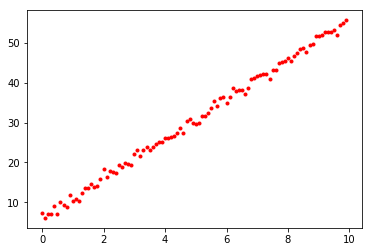

In [4]:
plt.plot(X, Y, 'r.') 
plt.show()

## 最小二乘
    结果：
$a=\frac{n\sum_{i=1}^{n}x_{i}y_{i} -\sum_{i=1}^{n}x_{i}\sum_{i=1}^{n}y_{i}}{n\sum_{i=1}^{n}x_{i}^{2}-(\sum_{i=1}^{n}x_{i})^{2} }$

$b=\frac{\sum_{i=1}^{n}x_{i}^{2}\sum_{i=1}^{n}y_{i} - \sum_{i=1}^{n}x_{i}\sum_{i=1}^{n}x_{i}y_{i}}{n\sum_{i=1}^{n}x_{i}^{2} - (\sum_{i=1}^{n}x_{i})^2}$

In [5]:
# 直接求a, b
def least_square1(x, y):
    sumxy = sum(x*y)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x**2)
    n = len(x)
    a = (n*sumxy - sumx*sumy) / (n*sumx2 -sumx**2)
    b = (sumx2*sumy - sumx*sumxy)/(n*sumx2 - sumx**2)
    return b, a

b, a = least_square1(X, Y)
b, a

(6.0506500686932858, 4.9847965519558137)

In [6]:
# 通过numpy.linalg.solve求
def least_square2(x, y): 
    sumxy = sum(x*y)
    sumx = sum(x)
    sumy = sum(y)
    sumx2 = sum(x**2)
    n = len(x)
    A = np.mat([[n, sumx], [sumx, sumx2]])
    b = np.array([sumy, sumxy])
    return np.linalg.solve(A, b)
b, a = least_square2(X, Y)
b, a

(6.0506500686932956, 4.9847965519558146)

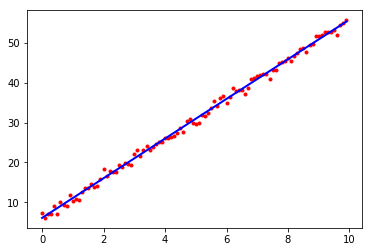

In [7]:
# 生成图像看下效果
X2 = np.arange(0, 10, 0.1)
Y2 = [b + a*x for x in X2]
plt.plot(X, Y, 'r.', X2, Y2, 'b',linewidth=2)
plt.show()

# 线性代数法
$X = (A^{T}A)^{-1}A^{T}b$

求解 $Ax=b$
往往是知道x和b反求A

In [8]:
# 线代法
A = np.mat([X, [1 for i in range(len(X))]]).T
b = np.mat(Y).T
ret_x = (A.T*A).I*A.T*b
ret_x

matrix([[ 4.98479655],
        [ 6.05065007]])